# Bike Sharing Assignment
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

## Problem Statement
- To identify the impact of various independant variables on the the demand variable using a Linear Regression Model

## Target Variable
- Here our target variable will be the demand for bikes, which is 'cnt'

## Solution Approach

### 1. Data understanding & EDA
### 2. Data Preparation & Modelling 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##  Data understanding & EDA
### Understanding the Data Dictionary

In [2]:
# Reading the data from csv file
df = pd.read_csv('day.csv',low_memory=False)
#Reading first 5 rows
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Shape of the dataframe
df.shape

(730, 16)

In [4]:
#getting the info of the date
df.info()
# There are no missing or null values in any columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observations

- There are overall 730 rows and 16 columns
- There are no Null values


We will convert the season, month, weekday and weathersit column values to meaningfull catergorical strings

In [7]:
#converting Year values to catergorical string
df.yr = df.yr.map({0:'2018_yr',1:'2019_yr'})

In [8]:
#converting season values to catergorical string
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
#converting month values to catergorical string
df.mnth = df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [10]:
#converting weekday values to catergorical string
df.weekday = df.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})

In [11]:
#converting weathersit values to catergorical string
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'Light',4:'Heavy'})

In [12]:
#Dropping instant column
df.drop('instant',axis=1,inplace=True)

In [13]:
### As we can see cnt is the sum of both casual and registered value, it does not help in our analysis to predict cnt
#Dropping casual and registered columns
df.drop('casual',axis=1,inplace=True)
df.drop('registered',axis=1,inplace=True)

In [14]:
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018_yr,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018_yr,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018_yr,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018_yr,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018_yr,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Univariate Analysis

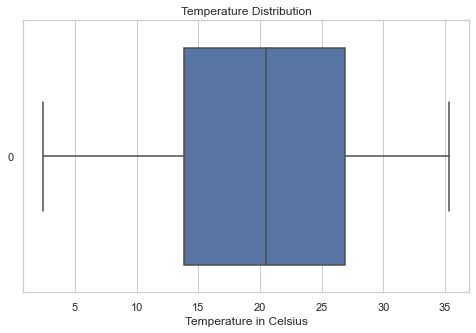

In [15]:
# Analysing temp
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df.temp, orient='h').set(xlabel='Temperature in Celsius',title = 'Temperature Distribution')
plt.show()

<AxesSubplot:xlabel='temp', ylabel='Density'>

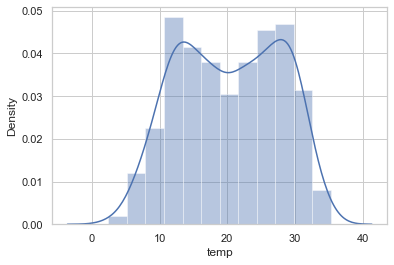

In [16]:
sns.distplot(df.temp)

- The temperature does not have a long tail and does not have an outlier

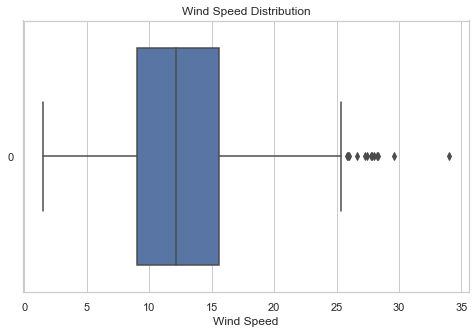

In [17]:
#Analysing windspeed
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df.windspeed, orient='h').set(xlabel='Wind Speed',title = 'Wind Speed Distribution')
plt.show()

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

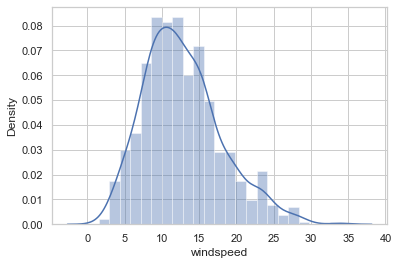

In [18]:
sns.distplot(df.windspeed)

- The windspeed follows a normal distribution with a negligible outlier

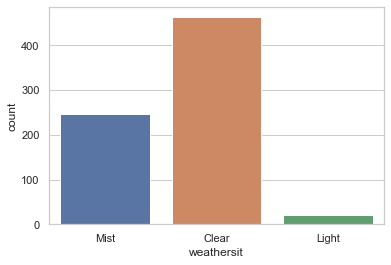

In [19]:
#Analysing weathersit
sns.countplot(df.weathersit)
plt.show()

- We see most of the days were clear weather with few misty conditions

## Bivariate Analysis

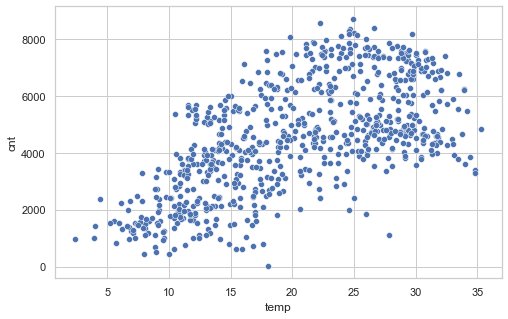

In [20]:
# Plotting Count vs Temperature
plt.subplots(figsize=(8, 5))
sns.scatterplot(data = df, x = 'temp', y = 'cnt')
plt.show()

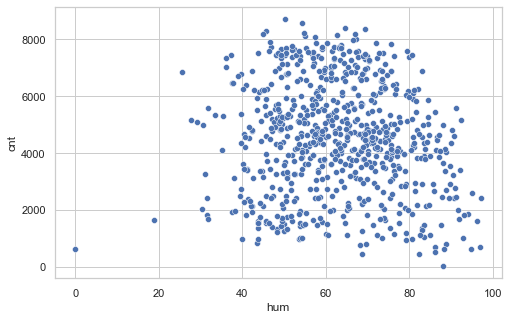

In [21]:
# Plotting Count vs Humidity
plt.subplots(figsize=(8, 5))
sns.scatterplot(data = df, x = 'hum', y = 'cnt')
plt.show()

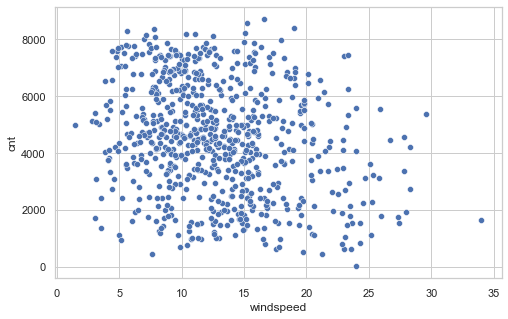

In [22]:
# Plotting Count vs Windspeed
plt.subplots(figsize=(8, 5))
sns.scatterplot(data = df, x = 'windspeed', y = 'cnt')
plt.show()

- There is a strong correlation between count and temperature but not a clear relation between count and humidity and windspeed

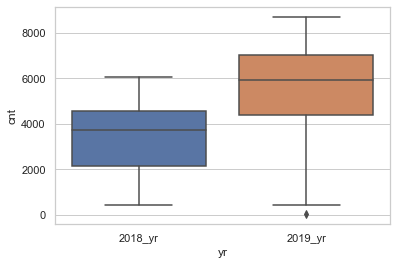

In [23]:
# Plotting Count vs Year
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

- The above plot shows that there is an increase in count from 2018 to 2019

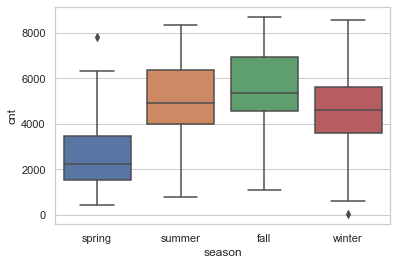

In [24]:
# Plotting Count vs Season
sns.boxplot(data=df, y='cnt',x='season')
plt.show()

 - Spring season has less demand compared to other seasons

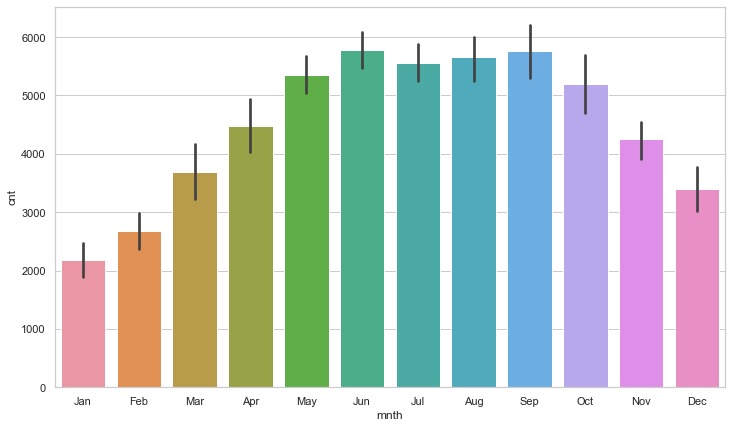

In [25]:
# Plotting Count vs Month
plt.figure(figsize=(12,7))
sns.barplot(data = df, x = 'mnth', y = 'cnt')
plt.show()

- We can see the count is high during middle of the year only

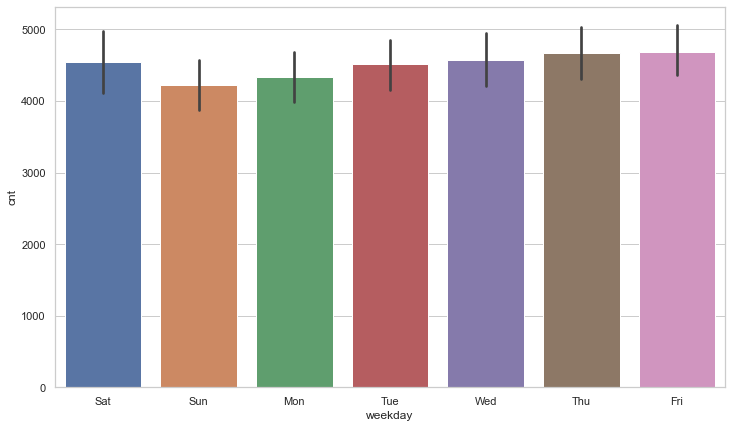

In [26]:
# Plotting Count vs Week
plt.figure(figsize=(12,7))
sns.barplot(data = df, x = 'weekday', y = 'cnt')
plt.show()

- No significant pattern depending on days of a week

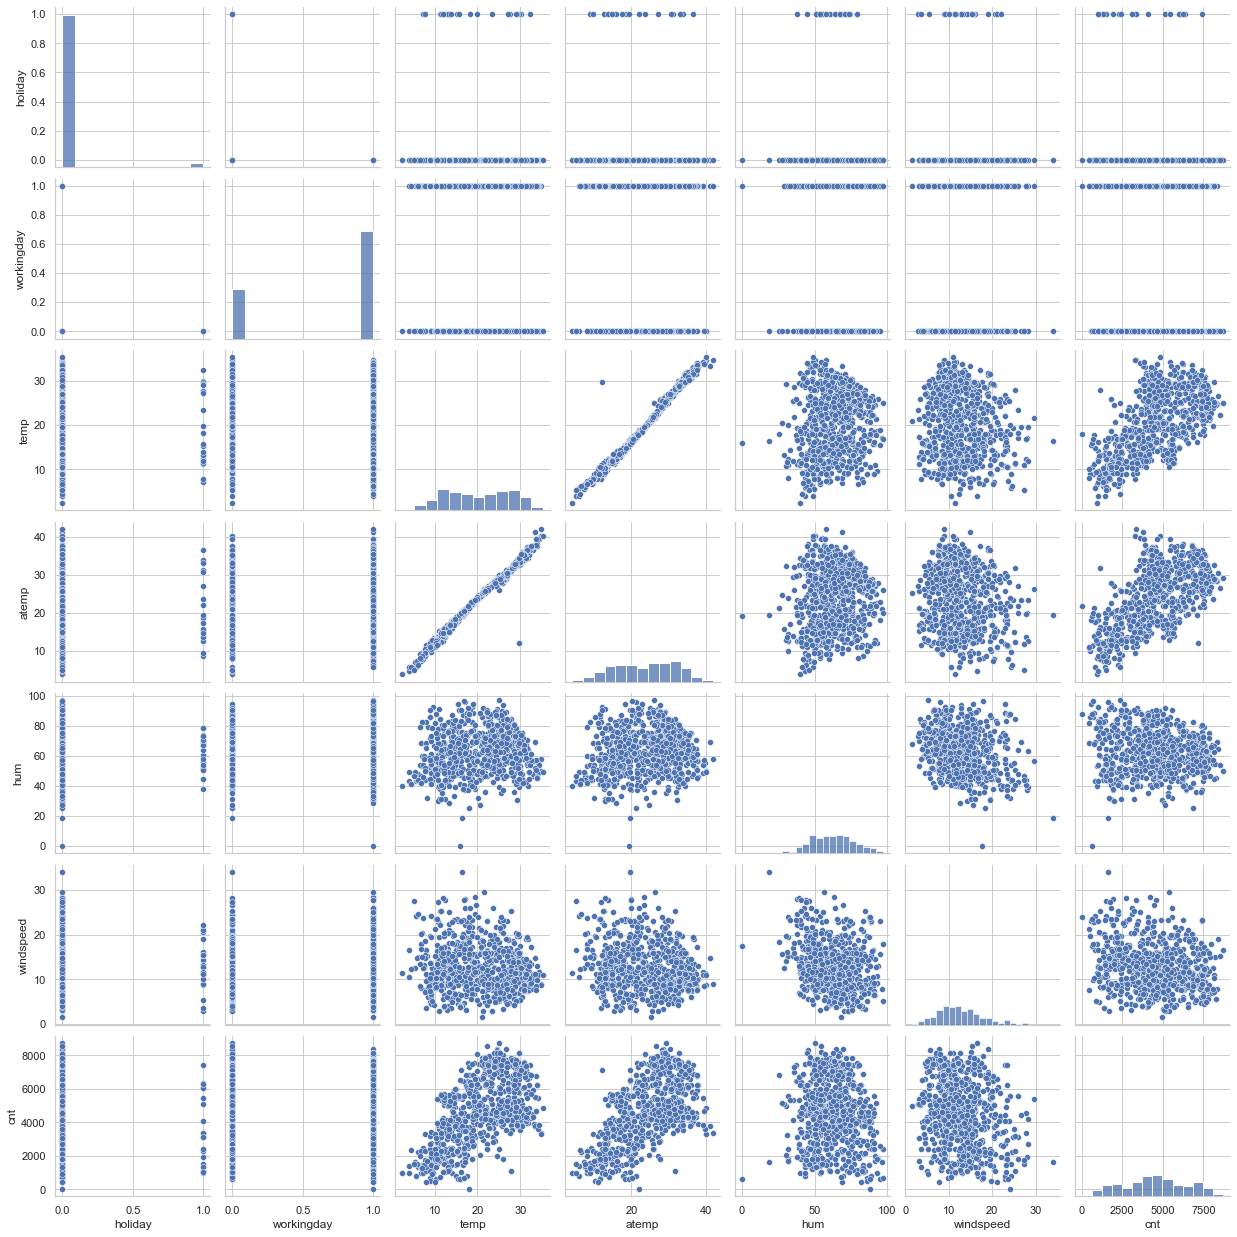

In [27]:
# Plotting a pair plot among the variables
sns.pairplot(df)
plt.show()

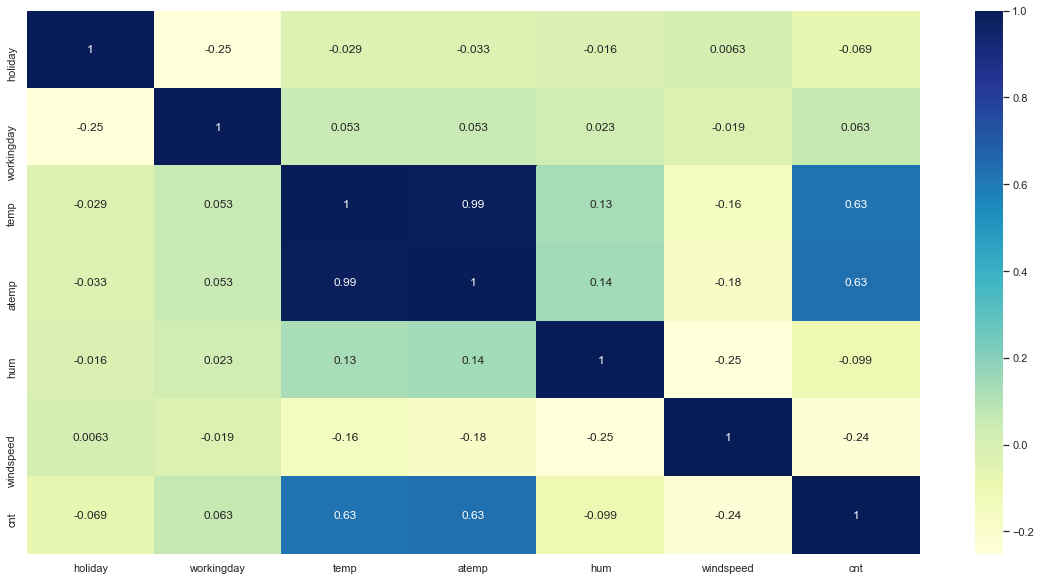

In [28]:
#Identifying the correlation
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

#### From the above pariplot and heat map, it is evident that temp and atemp are highly correlated. Hence lets drop atemp column.

In [29]:
df.drop('atemp',axis=1,inplace=True)

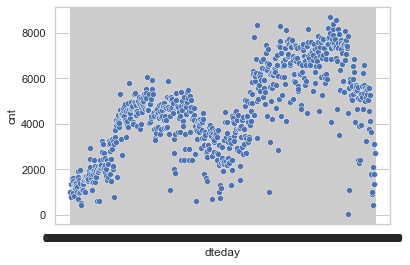

In [30]:
#Plotting Count vs Date
sns.scatterplot(data=df,y='cnt',x='dteday')
plt.show()

#### From the above, we see that the count increases in middle of the year and decreases at the end. This pattern is also explained by the month column. Hence we can drop date column.

In [31]:
#Dropping date column
df.drop('dteday',axis=1,inplace=True)

#### We also notice that the count has increased from 2018 to 2019 year

In [32]:
#converting Year values to back to 0 and 1
df.yr = df.yr.map({'2018_yr':0,'2019_yr':1})

### Data Preparation & Modelling 
#### Dummy Variables

- We have season, mnth, weekday and weathersit values as categorical variables with multiple levels. 
- Lets convert them to integers

In [33]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(df['mnth'], drop_first = True)

In [34]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season1'

season1 = pd.get_dummies(df['season'], drop_first = True)

In [35]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday1'

weekday1 = pd.get_dummies(df['weekday'], drop_first = True)

In [36]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit1'

weathersit1 = pd.get_dummies(df['weathersit'], drop_first = True)

In [37]:
# Add the results to the original dataframe

df = pd.concat([df, month], axis = 1)
df = pd.concat([df, season1], axis = 1)
df = pd.concat([df, weekday1], axis = 1)
df = pd.concat([df, weathersit1], axis = 1)

In [38]:
# Droping the original variables as we have created the dummies for it

df.drop(['mnth'], axis = 1, inplace = True)
df.drop(['season'], axis = 1, inplace = True)
df.drop(['weekday'], axis = 1, inplace = True)
df.drop(['weathersit'], axis = 1, inplace = True)

In [39]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the Data into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split

# We specify the random_state as this will produce the same set of train and test data all the time

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 333)

### Rescaling the Features 

- We will be using MinMax scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light,Mist
483,1,0,0,0.497426,0.609956,0.194850,0.722734,0,0,0,...,1,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.513852,0.255118,0.815347,0,0,0,...,0,1,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.572294,0.276919,0.488265,1,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.871429,0.161523,0.433042,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.451083,0.700017,0.092039,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Dividing data into independent and dependent variables, i.e. X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building The Model

- We will start with LinearRegression function from SciKit Learn for its compatibility with RFE 
- Also use Reccursive Feature Elimination utility

In [44]:
# Importing LinearRegression and RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [45]:
#Creating a model and using it in RFE function to identify the recomendation
lm = LinearRegression()
lm.fit(X_train,y_train)

#selecting top 15 columns
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [46]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 12),
 ('Tue', False, 9),
 ('Wed', False, 14),
 ('Light', True, 1),
 ('Mist', True, 1)]

In [47]:
#creating the RFE supported column list
col = X_train.columns[rfe.support_]

Now we will use Statsmodel to build a model and have a look at the statistics

In [48]:
#Creating X_train_rfe for rfe recommended columns
X_train_rfe = X_train[col]

In [49]:
#We will have to add the constant variable 
import statsmodels.api as sm
#Creating the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
#Summary of the model created
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.19e-186
Time:                        19:42:22   Log-Likelihood:                 508.03
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     494   BIC:                            -916.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3309      0.034      9.740      0.000       0.264       0.398
yr             0.2291      0.008     28.005      0.000       0.213       0.245
workingday     0.0389      0.011      3.512      0.000       0.017       0.061
temp           0.4505      0.032     14.166      0.000       0.388       0.513
hum           -0.1631      0.038     -4.336      0.000      -0.237      -0.089
windspeed     -0.1854      0.028     -6.731      0.000      -0.240      -0.131
Dec           -0.0417      0.017     -2.415      0.016      -0.076      -0.008
Jul           -0.0495      0.017     -2.890      0.004      -0.083      -0.016
Mar            0.0479      0.016      3.000      0.003       0.017       0.079
Nov           -0.0606      0.019     -3.244      0.001      -0.097      -0.024
Sep            0.0597      0.015      3.856      0.000       0.029       0.090
spring        -0.1260      0.015     -8.227      0.000      -0.156      -0.096
winter         0.0804      0.014      5.716      0.000       0.053       0.108
Sat            0.0543      0.014      3.788      0.000       0.026       0.083
Light         -0.2682      0.028     -9.438      0.000      -0.324      -0.212
Mist          -0.0497      0.011     -4.641      0.000      -0.071      -0.029
==============================================================================
Omnibus:                       77.840   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.829
Skew:                          -0.795   Prob(JB):                     7.33e-41
Kurtosis:                       5.484   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Lets identify if there are any multicollinearity among the variables
#Calculating the VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,23.20
2,temp,16.56
4,windspeed,5.10
1,workingday,4.80
10,spring,2.77
11,winter,2.73
14,Mist,2.26
0,yr,2.05
8,Nov,1.83
12,Sat,1.83


### Dropping the variable and updating the model
- We consider VIF less than 5

In [53]:
# Dropping humidity (hum) variable as it has high VIF
X_train_1 = X.drop(['hum'],axis=1)
X_train_1.head()

,yr,workingday,temp,windspeed,Dec,Jul,Mar,Nov,Sep,spring,winter,Sat,Light,Mist
483,1,0,0.497426,0.194850,0,0,0,0,0,0,0,0,0,0
650,1,0,0.416433,0.255118,0,0,0,0,0,0,1,1,0,0
212,0,1,0.887856,0.276919,0,0,0,0,0,0,0,0,0,0
714,1,0,0.378013,0.161523,1,0,0,0,0,0,1,0,0,1
8,0,0,0.098690,0.700017,0,0,0,0,0,1,0,0,0,0


In [54]:
X_train_1 = sm.add_constant(X_train_1)

In [55]:
lm2 = sm.OLS(y_train,X_train_1).fit()

In [56]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.98e-183
Time:                        19:42:32   Log-Likelihood:                 498.50
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     495   BIC:                            -903.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2378      0.027      8.875      0.000       0.185       0.290
yr             0.2333      0.008     28.212      0.000       0.217       0.250
workingday     0.0408      0.011      3.622      0.000       0.019       0.063
temp           0.4219      0.032     13.324      0.000       0.360       0.484
windspeed     -0.1514      0.027     -5.634      0.000      -0.204      -0.099
Dec           -0.0508      0.017     -2.910      0.004      -0.085      -0.016
Jul           -0.0423      0.017     -2.440      0.015      -0.076      -0.008
Mar            0.0536      0.016      3.311      0.001       0.022       0.085
Nov           -0.0605      0.019     -3.179      0.002      -0.098      -0.023
Sep            0.0548      0.016      3.483      0.001       0.024       0.086
spring        -0.1277      0.016     -8.194      0.000      -0.158      -0.097
winter         0.0748      0.014      5.250      0.000       0.047       0.103
Sat            0.0555      0.015      3.800      0.000       0.027       0.084
Light         -0.3167      0.027    -11.913      0.000      -0.369      -0.264
Mist          -0.0768      0.009     -8.674      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       78.526   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.929
Skew:                          -0.795   Prob(JB):                     5.72e-42
Kurtosis:                       5.531   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking the VIF in the current model
vif = pd.DataFrame()
X = X_train_1.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,7.17
3,windspeed,5.08
1,workingday,4.65
10,winter,2.39
9,spring,2.11
0,yr,2.04
7,Nov,1.81
11,Sat,1.78
13,Mist,1.55
5,Jul,1.39


In [58]:
# Dropping humidity (hum) variable as it has high VIF
X_train_1 = X.drop(['windspeed'],axis=1)
X_train_1.head()

,yr,workingday,temp,Dec,Jul,Mar,Nov,Sep,spring,winter,Sat,Light,Mist
483,1,0,0.497426,0,0,0,0,0,0,0,0,0,0
650,1,0,0.416433,0,0,0,0,0,0,1,1,0,0
212,0,1,0.887856,0,0,0,0,0,0,0,0,0,0
714,1,0,0.378013,1,0,0,0,0,0,1,0,0,1
8,0,0,0.098690,0,0,0,0,0,1,0,0,0,0


In [59]:
X_train_1 = sm.add_constant(X_train_1)

In [60]:
lm3 = sm.OLS(y_train,X_train_1).fit()

In [61]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.71e-178
Time:                        19:42:36   Log-Likelihood:                 482.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     496   BIC:                            -878.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1719      0.025      6.920      0.000       0.123       0.221
yr             0.2310      0.009     27.141      0.000       0.214       0.248
workingday     0.0428      0.012      3.687      0.000       0.020       0.066
temp           0.4391      0.032     13.518      0.000       0.375       0.503
Dec           -0.0453      0.018     -2.523      0.012      -0.081      -0.010
Jul           -0.0356      0.018     -1.998      0.046      -0.071      -0.001
Mar            0.0530      0.017      3.178      0.002       0.020       0.086
Nov           -0.0664      0.020     -3.392      0.001      -0.105      -0.028
Sep            0.0612      0.016      3.791      0.000       0.030       0.093
spring        -0.1281      0.016     -7.975      0.000      -0.160      -0.097
winter         0.0874      0.015      6.024      0.000       0.059       0.116
Sat            0.0546      0.015      3.628      0.000       0.025       0.084
Light         -0.3330      0.027    -12.226      0.000      -0.386      -0.279
Mist          -0.0749      0.009     -8.223      0.000      -0.093      -0.057
==============================================================================
Omnibus:                       83.222   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.483
Skew:                          -0.803   Prob(JB):                     1.79e-49
Kurtosis:                       5.826   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Checking the VIF in the current model
vif = pd.DataFrame()
X = X_train_1.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.49
1,workingday,4.58
9,winter,2.38
0,yr,2.03
6,Nov,1.77
8,spring,1.74
10,Sat,1.74
12,Mist,1.54
4,Jul,1.37
3,Dec,1.35


In [63]:
# Dropping humidity (hum) variable as it has high VIF
X_train_1 = X.drop(['Jul'],axis=1)
X_train_1.head()

,yr,workingday,temp,Dec,Mar,Nov,Sep,spring,winter,Sat,Light,Mist
483,1,0,0.497426,0,0,0,0,0,0,0,0,0
650,1,0,0.416433,0,0,0,0,0,1,1,0,0
212,0,1,0.887856,0,0,0,0,0,0,0,0,0
714,1,0,0.378013,1,0,0,0,0,1,0,0,1
8,0,0,0.098690,0,0,0,0,1,0,0,0,0


In [64]:
X_train_1 = sm.add_constant(X_train_1)

In [65]:
lm4 = sm.OLS(y_train,X_train_1).fit()

In [66]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.95e-178
Time:                        19:42:46   Log-Likelihood:                 480.61
No. Observations:                 510   AIC:                            -935.2
Df Residuals:                     497   BIC:                            -880.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1800      0.025      7.323      0.000       0.132       0.228
yr             0.2313      0.009     27.092      0.000       0.214       0.248
workingday     0.0446      0.012      3.841      0.000       0.022       0.067
temp           0.4162      0.030     13.655      0.000       0.356       0.476
Dec           -0.0470      0.018     -2.612      0.009      -0.082      -0.012
Mar            0.0541      0.017      3.238      0.001       0.021       0.087
Nov           -0.0686      0.020     -3.496      0.001      -0.107      -0.030
Sep            0.0667      0.016      4.176      0.000       0.035       0.098
spring        -0.1313      0.016     -8.195      0.000      -0.163      -0.100
winter         0.0883      0.015      6.073      0.000       0.060       0.117
Sat            0.0554      0.015      3.677      0.000       0.026       0.085
Light         -0.3344      0.027    -12.246      0.000      -0.388      -0.281
Mist          -0.0737      0.009     -8.079      0.000      -0.092      -0.056
==============================================================================
Omnibus:                       85.477   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.855
Skew:                          -0.828   Prob(JB):                     3.33e-50
Kurtosis:                       5.825   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above model has very similar R-squared and Adj R-squared.
#### All the p values are within the permissible limit to reject the null hypothesis, which is the variables are not significant

In [67]:
# Checking the VIF in the current model
vif = pd.DataFrame()
X = X_train_1.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.53
1,workingday,4.48
8,winter,2.35
0,yr,2.03
5,Nov,1.77
7,spring,1.74
9,Sat,1.73
11,Mist,1.53
3,Dec,1.35
4,Mar,1.21


#### The features do not have multicollinearity among themselves

### Residual Analysis of the train data

In [68]:
# Model lm4 analysis
y_train_pred = lm4.predict(X_train_1)

Text(0.5, 0, 'Errors')

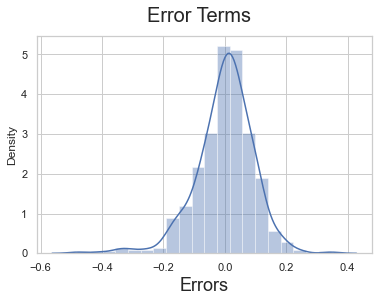

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

#### From the above graph, it is evident that the errors are normally distributed. Hence our assumptions of  linear regression is true.

### Making Predictions

Applying scaling on the test sets

In [70]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
# Dividing into X and Y test data
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Using model for predictions
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making Predictions
y_test_pred = lm4.predict(X_test_new)

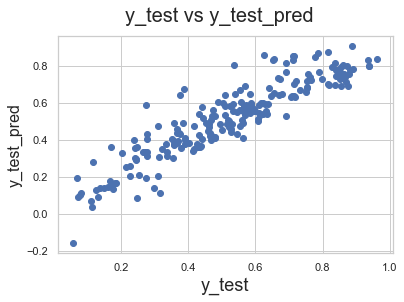

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   
plt.show()

In [76]:
# Finding the R2 and adjusted R2 to compare the model based on test and train data predictions

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
r2

0.8286650055308894

In [77]:
# Identifying the adjusted R2 using the below formula 
### adj R2 = 1 -(1-R2)*(n-1/n-p-1)
### where n is the total number of samples and p is the total number of features in the model
n = X_test_new.shape[0]
p = X_test_new.shape[1]

print(1-(1-r2)*((n-1)/(n-p-1)))

0.8177998595401653


### Evaluation

#### Comparing the results

    - Train R2     :0.823
    - Train Adj R2 :0.819
    - Test  R2     :0.828
    - Test Adj R2  :0.817
    
 #### With all the above values coming very close to one another, we can conclude this is a good model

### Below are the coefficient values in the model
- temp       :0.4162
- yr         :0.2313
- winter     :0.0883
- Sep        :0.0667
- Sat        :0.0554
- Mar        :0.0541
- workingday :0.0446
- Dec        :-0.047
- Nov        :-0.0686
- Mist       :-0.0737
- spring     :-0.1313
- Light      :-0.3344

### As we can see, the top 3 features are temperature, weathersit with light snow/rain/thunderstorm and year.
- As temperature increases, more bikes are being rented
- If there are any light weather impacts, the bike demand goes down
- Over the time, i.e. by year the demand increases by 0.23 times

The equation for our best fitted line is:

Count  = 0.18 + tempx0.4162 + yrx0.2313 + winterx0.0883 + Sepx0.0667 + Satx0.0554 + Marx0.0541 + workingdayx0.0446 - Decx0.047 - Novx0.0686 - Mistx0.0737 - springx0.1313 - Lightx0.3344